<a href="https://colab.research.google.com/github/ahyoungKwon/aipython/blob/main/240524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 데이터 파일 읽어오기
iris = pd.read_csv('iris.csv')

In [33]:
# 데이터 기본 정보 출력
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# 데이터 기초 통계량 출력
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# 품종별 개수 구하기
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [18]:
# 결측치 확인
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [19]:
# 중복 데이터 확인
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [35]:
# 중복 데이터 모두 확인
idx = (iris['sepal_length']==5.8) & (iris['petal_width']==1.9)
iris.loc[idx, :]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [20]:
# 중복 데이터 삭제
new_iris = iris.drop_duplicates()

In [36]:
# 품종 열을 기준으로 합계 구하기
sum_species = new_iris.groupby('species').sum()
print(sum_species)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0         66.3
virginica          323.6        146.0         272.5         99.4


In [37]:
# 품종 열을 기준으로 평균 구하기
mean_species = new_iris.groupby('species').mean()
print(mean_species)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          5.006000     3.428000      1.462000     0.246000
versicolor      5.936000     2.770000      4.260000     1.326000
virginica       6.604082     2.979592      5.561224     2.028571


<BarContainer object of 10 artists>

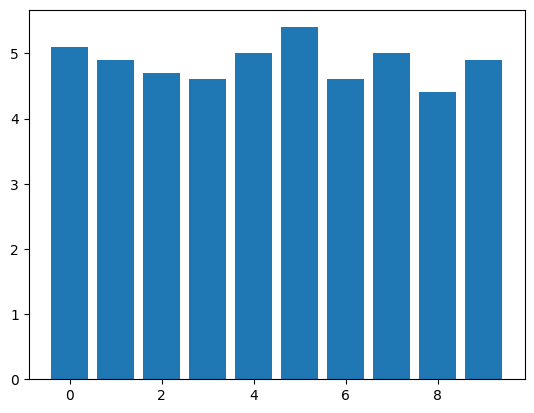

In [41]:
# 꽃받침 길이의 시각화
plt.bar(new_iris.index[:10], new_iris.sepal_length[:10])

<BarContainer object of 3 artists>

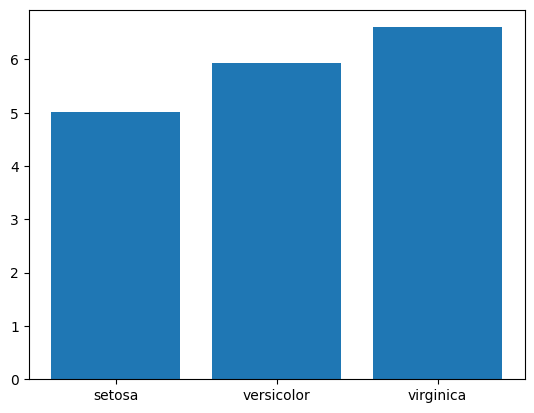

In [42]:
# 붓꽃 종류별 꽃받침 평균에 대한 시각화

iris_mean = new_iris.groupby('species').mean()
plt.bar(iris_mean.index, iris_mean['sepal_length'])

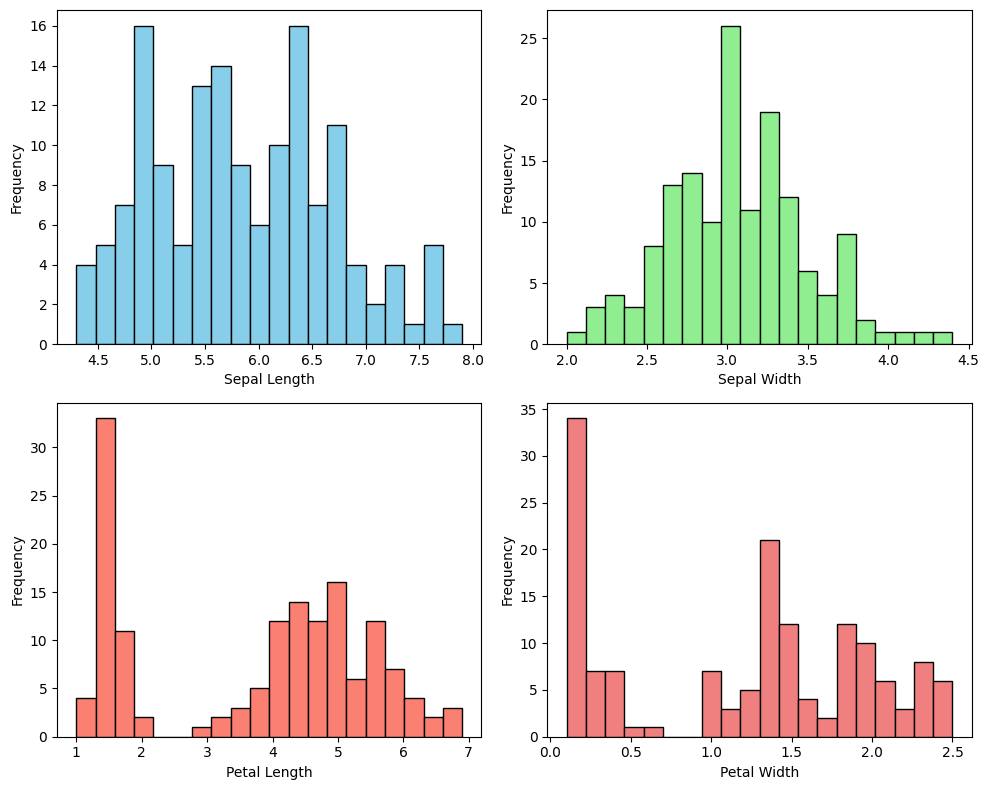

In [43]:
# 히스토그램
plt.figure(figsize=(10, 8))

# 꽃받침 길이
plt.subplot(2, 2, 1)
plt.hist(new_iris['sepal_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

# 꽃받침 너비
plt.subplot(2, 2, 2)
plt.hist(new_iris['sepal_width'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

# 꽃잎 길이
plt.subplot(2, 2, 3)
plt.hist(new_iris['petal_length'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')

# 꽃잎 너비
plt.subplot(2, 2, 4)
plt.hist(new_iris['petal_width'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


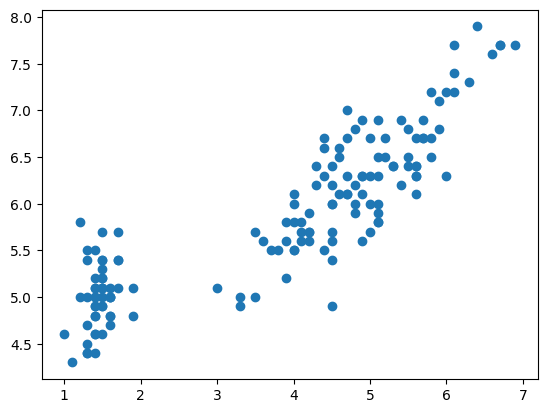

In [30]:
# 산점도
plt.scatter(new_iris['petal_length'], new_iris['sepal_length'])